**In part I, we have collected two dataset in this part we will try to explore the dataset and find insights in it.**

Exploratory Data Analysis (EDA):
---
Exploratory Data Analysis is a process of :-
* understanding the data
* building intuition about the data
* generating and  testing hypothesis about data
* and finding insights in the data


Our Aim:
---
In this part, we will first try to verify assumption of **Part I - Reddit Data Collection**:
* whether feature collected of a post relates to flair of a post
* then, we will try to find insight in the data
* and at last, try to generate new features.

**Note: This part has been divided into three sections:**
1. Univariate Analysis: to explore individual features
2. Bivariate Analysis: to explore feature relations
3. Feature Engineering: to create new features

In [0]:
from google.colab import files

files.upload()

Saving data_subset.csv to data_subset.csv


{'data_subset.csv': b'author,created_utc,link_flair_text,num_comments,score,over_18,selftext,title,url,comments,comments_author\nsanand_satwik,1586713348.0,AskIndia,132,1041,False,"Hi....It\'s really tough time for everyone. I recently lost my job. My mom is a lever patient. The money which I saved is already spent on my mother\'s treatment. Now can you tell me how to earn money online? I don\'t have money actually right now so suggest a way so that I get paid asap. Thanks for reading! \xf0\x9f\x99\x8f\n\nUpdate: Few of you are asking my qualifications and skills.\nAn engineering graduate, I have experience in WordPress customization, logo design and content writing. Apart from these, I do have video editing knowledge as well. So please suggest accordingly. Previously I worked in a company which had data annotation work for AI( company lost the project, subsequently I lost my job). Currently, I am learning web technologies like PHP, js.","Lost my Job, Sick Mother and Paralysed Dad, In 

In [3]:
import pandas as pd
df = pd.read_csv('data_subset.csv')
df.head()

,author,created_utc,link_flair_text,num_comments,score,over_18,selftext,title,url,comments,comments_author
0,sanand_satwik,1.586713e+09,AskIndia,132,1041,False,Hi....It's really tough time for everyone. I r...,"Lost my Job, Sick Mother and Paralysed Dad, In...",https://www.reddit.com/r/india/comments/g014wc...,I'm a freelancer. Don't listen to the idiots ...,hashedram diabapp xataari Aashayrao sarcrasti...
1,TWO-WHEELER-MAFIA,1.586419e+09,AskIndia,205,646,False,"We have floods, terrorist attacks, famines due...",Why does the government come with a begging bo...,https://www.reddit.com/r/india/comments/fxofyu...,I don't understand why they don't use money f...,Kinky-Monk ak32009 fools_eye None DwncstSheep...
2,indianoogler,1.586178e+09,AskIndia,214,260,False,The corona virus has given me some time to thi...,Men who are 30+ and have decided not to get ma...,https://www.reddit.com/r/india/comments/fvy95j...,Plan your finances. Work and enjoy in your ow...,RedDevil-84 congratsindia khushraho kingof-po...
3,cataglottis,1.586783e+09,AskIndia,139,130,False,Seems like everybody here is very critical of ...,"r/India: If money is no bar, would you prefer ...",https://www.reddit.com/r/india/comments/g0igt7...,"if money is not a thing, i would choose india...",_azadak 1209naveen reti_opening Neglectedsinc...
4,flaregunistaken,1.586332e+09,AskIndia,182,122,False,Sorry for poor formatting I am on phone.\n\n\n...,She is leaving me because of me being poor wha...,https://www.reddit.com/r/india/comments/fx29yh...,She was your Half Girlfriend. Picture is over...,satyasys dummy_roxx pandox992bu Bombaysux Bes...


Univariate Analysis:
---

In [2]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
import plotly.plotly as py
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
from collections import Counter
import scattertext as st
import spacy
from pprint import pprint
import en_core_web_sm
#nlp = spacy.load('en_core_web_md')

In [0]:
# to display plotly figures in google colab
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [6]:
configure_plotly_browser_state()
df['link_flair_text'].iplot(
    kind='hist',
    bins=50,
    xTitle='flair',
    linecolor='black',
    yTitle='count',
    title='Flair Distribution')

In [7]:
configure_plotly_browser_state()
df['author'].iplot(
    kind='hist',
    bins=50,
    xTitle='Authors',
    linecolor='black',
    yTitle='count',
    title='Authors Distribution')

In [9]:
configure_plotly_browser_state()
df['title'].iplot(
    kind='hist',
    bins=100,
    xTitle='title length',
    linecolor='black',
    yTitle='count',
    title='Title Text Length Distribution')

Exploring Feature Relations:
---

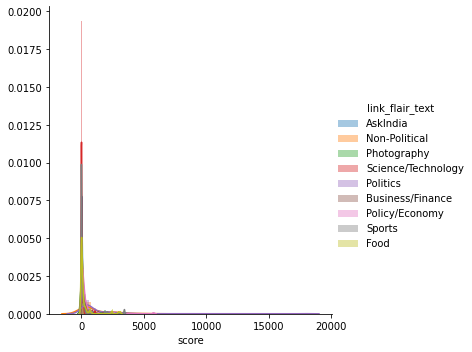

In [14]:
sns.FacetGrid(df, hue='link_flair_text', size=5).map(sns.distplot, "score").add_legend();

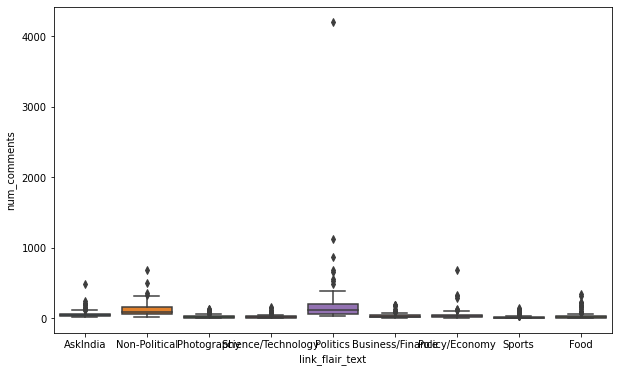

In [23]:
sns.boxplot(x='link_flair_text', y='num_comments', data=df)
plt.show();

In [11]:
configure_plotly_browser_state()
trace1 = go.Scatter(
    x=df['link_flair_text'], y=df['title'], mode='markers', name='points',
    marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
)
trace2 = go.Histogram2dContour(
    x=df['link_flair_text'], y=df['title'], name='density', ncontours=20,
    colorscale='Hot', reversescale=True, showscale=False
)
trace3 = go.Histogram(
    x=df['link_flair_text'], name='Sentiment polarity density',
    marker=dict(color='rgb(102,0,0)'),
    yaxis='y2'
)
trace4 = go.Histogram(
    y=df['link_flair_text'], name='Rating density', marker=dict(color='rgb(102,0,0)'),
    xaxis='x2'
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=False,
    autosize=False,
    width=600,
    height=550,
    xaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    margin=dict(
        t=50
    ),
    hovermode='closest',
    bargap=0,
    xaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    ),
    yaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='2dhistogram-2d-density-plot-subplots')

Feature Engineering:
---
Using **title** as text feature to engineer new features

In [20]:
import os
import re
import numpy as np
import pandas_profiling
import gc
import json
from tqdm import tqdm 
from edm import report
import collections 
from collections import Counter

#NLTK
import nltk
from nltk.corpus import stopwords
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.util import ngrams

# spaCy based imports
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
eng_stopwords = STOP_WORDS


#Etc
import matplotlib.pyplot as plt 
import seaborn as sns
import time
import operator 

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
pd.set_option('max_colwidth',400)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
df['title'] = df['title'].astype(str)
df['link_flair_text'] = df['link_flair_text'].astype(str)

In [6]:
print('Average count of phrases per sentence in train/target is {0:.0f}.'.format(df.groupby('link_flair_text')['title'].count().mean()))
print('Number of phrases in Data set: {}. Number of Target Variables: {}.'.format(df.shape[0], len(df.title.unique())))
print('Average word length of phrases in train is {0:.0f}.'.format(np.mean(df['title'].apply(lambda x: len(x.split())))))
print('\n','Number of phrases per target variable',Counter(df.link_flair_text))

Average count of phrases per sentence in train/target is 100.
Number of phrases in Data set: 900. Number of Target Variables: 898.
Average word length of phrases in train is 13.

 Number of phrases per target variable Counter({'AskIndia': 100, 'Non-Political': 100, 'Photography': 100, 'Science/Technology': 100, 'Politics': 100, 'Business/Finance': 100, 'Policy/Economy': 100, 'Sports': 100, 'Food': 100})


Most common bigrams:
---

In [0]:
counts = collections.Counter()

for sent in df['title']:
    words = nltk.word_tokenize(sent)
    counts.update(nltk.bigrams(words))

In [0]:
Bigram_Counts = counts.most_common(5)
Bigram_Counts

[(('’', 's'), 47),
 (('in', 'India'), 38),
 (('of', 'the'), 22),
 (('in', 'the'), 21),
 (('of', 'India'), 18)]

Most Common Trigrams:
---

In [0]:
counts = collections.Counter()


for sent in df['title']:
    words = nltk.word_tokenize(sent)
    counts.update(nltk.trigrams(words))

In [0]:
Trigram_Counts = counts.most_common(5)
Trigram_Counts

[(('[', 'OC', ']'), 17),
 (('India', '’', 's'), 15),
 (('in', 'India', '?'), 5),
 (('I', 'want', 'to'), 5),
 (('OC', ']', '['), 5)]

In [0]:
def count_regexp_occ(regexp="", text=None):
    """ Simple way to get the number of occurence of a regex"""
    return len(re.findall(regexp, text))

In [8]:
print(">> Generating Numerical Features For Text")

def numerical_features(df):
    
    df['char_count'] = df['title'].apply(len)   
    
    df['num_words'] = df['title'].apply(lambda comment: len(comment.split()))

  
    df['capitals'] = df['title'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
    
    df['caps_vs_length'] = df.apply(lambda row: float(row['capitals'])/float(row['char_count']),
                                axis=1)
    df['num_exclamation_marks'] = df['title'].apply(lambda comment: comment.count('!'))
    
    df['num_question_marks'] = df['title'].apply(lambda comment: comment.count('?'))
    
    df['num_punctuation'] = df['title'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
    
    
    df["num_stopwords"] = df["title"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

    
    df['num_symbols'] = df['title'].apply(
    lambda comment: sum(comment.count(w) for w in '*&$%'))
    
    
    df['mean_word_len'] = df['title'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    
    df['num_unique_words'] = df['title'].apply(
    lambda comment: len(set(w for w in comment.split())))
    
    df['words_vs_unique'] = df['num_unique_words'] / df['num_words']
    
    df['num_smilies'] = df['title'].apply(
    lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))
    
    # Count number of \n
    df["ant_slash_n"] = df["title"].apply(lambda x: count_regexp_occ(r"\n", x))
    
    # Check for time stamp
    df["has_timestamp"] = df["title"].apply(lambda x: count_regexp_occ(r"\d{2}|:\d{2}", x))
    
    # Check for http links
    df["has_http"] = df["title"].apply(lambda x: count_regexp_occ(r"http[s]{0,1}://\S+", x))
    
    return

>> Generating Numerical Features For Text


In [0]:
numerical_features(df)

In [10]:
df.head(1).T

,0
author,sanand_satwik
created_utc,1.58671e+09
link_flair_text,AskIndia
num_comments,132
score,1041
over_18,False
selftext,Hi....It's really tough time for everyone. I recently lost my job. My mom is a lever patient. The money which I saved is already spent on my mother's treatment. Now can you tell me how to earn money online? I don't have money actually right now so suggest a way so that I get paid asap. Thanks for reading! 🙏\n\nUpdate: Few of you are asking my qualifications and skills.\nAn engineering graduate...
title,"Lost my Job, Sick Mother and Paralysed Dad, In this lockdown how to earn online?"
url,https://www.reddit.com/r/india/comments/g014wc/lost_my_job_sick_mother_and_paralysed_dad_in_this/
comments,I'm a freelancer. Don't listen to the idiots here. You can't freelance online as a beginner. That's a hard fact. No one will trust you with a job. I've been freelancing for years and I know what I'm talking about.\n\nLook for NGO's in your area and contact them one by one. Definitely one of them will be able to help. Also look for govt schemes. Call your local municipality or corporation and ...


Parts of Speech Features:
---

In [0]:
def tag_part_of_speech(text):
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    pos_list = pos_tag(text_splited)
    noun_count = len([w for w in pos_list if w[1] in ('NN','NNP','NNPS','NNS')])
    adjective_count = len([w for w in pos_list if w[1] in ('JJ','JJR','JJS')])
    verb_count = len([w for w in pos_list if w[1] in ('VB','VBD','VBG','VBN','VBP','VBZ')])
    return[noun_count, adjective_count, verb_count]

In [12]:
print(">> Generating POS Features")
for df in ([df]):
    df['nouns'], df['adjectives'], df['verbs'] = zip(*df['title'].apply(
        lambda comment: tag_part_of_speech(comment)))
    df['nouns_vs_length'] = df['nouns'] / df['char_count']
    df['adjectives_vs_length'] = df['adjectives'] / df['char_count']
    df['verbs_vs_length'] = df['verbs'] /df['char_count']
    df['nouns_vs_words'] = df['nouns'] / df['num_words']
    df['adjectives_vs_words'] = df['adjectives'] / df['num_words']
    df['verbs_vs_words'] = df['verbs'] / df['num_words']
    # More Handy Features
    df["count_words_title"] = df["title"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
    df['punct_percent']= df['num_punctuation']*100/df['num_words']

>> Generating POS Features


In [13]:
df.head().T

,0,1,2,3,4
author,sanand_satwik,TWO-WHEELER-MAFIA,indianoogler,cataglottis,flaregunistaken
created_utc,1.58671e+09,1.58642e+09,1.58618e+09,1.58678e+09,1.58633e+09
link_flair_text,AskIndia,AskIndia,AskIndia,AskIndia,AskIndia
num_comments,132,205,214,139,182
score,1041,646,260,130,122
over_18,False,False,False,False,False
selftext,Hi....It's really tough time for everyone. I recently lost my job. My mom is a lever patient. The money which I saved is already spent on my mother's treatment. Now can you tell me how to earn money online? I don't have money actually right now so suggest a way so that I get paid asap. Thanks for reading! 🙏\n\nUpdate: Few of you are asking my qualifications and skills.\nAn engineering graduate...,"We have floods, terrorist attacks, famines due to lack of rain, pandemic etc. After every such incident we see the governemnt approaching us with a begging bowl (PM CARES fund this time)\n\nWe pay so much money as tax, Be it on automobles, petrol, cigarettes, liquor, income tax, tax on electronics like laptops, mobile phones, toll on highways\n\nBhenchod why the fuck are you even collecting t...","The corona virus has given me some time to think about my life choices a bit. I am 32, male and have decided not to get married. Its not my thing. But I will be honest, I am worried about old age, not so much about loneliness but about sickness, weakness, inability to look after myself, financial support (I can still plan for this). In India, I think people still rely on their children to take...","Seems like everybody here is very critical of the direction India is heading towards. This makes me wonder, if money were to not be a thing anymore, how many people here would actually even live in India, if given the chance to be able to live anywhere in the world?",Sorry for poor formatting I am on phone.\n\n\nWe(M22|F25) are in relationship from past three year.\nWe both have already planned for marriage after being in relationship for 1 year .\n\n\n\nWe also know each other since high school so we are quite compatible and have a good understanding of each other.\n\n\n\nThings are going not as I supposed to go .\n\n\nNow she have changed her mind comple...
title,"Lost my Job, Sick Mother and Paralysed Dad, In this lockdown how to earn online?",Why does the government come with a begging bowl during every crisis?,"Men who are 30+ and have decided not to get married, what is your plan for old age?","r/India: If money is no bar, would you prefer to stay in India or outside?",She is leaving me because of me being poor what should I do?
url,https://www.reddit.com/r/india/comments/g014wc/lost_my_job_sick_mother_and_paralysed_dad_in_this/,https://www.reddit.com/r/india/comments/fxofyu/why_does_the_government_come_with_a_begging_bowl/,https://www.reddit.com/r/india/comments/fvy95j/men_who_are_30_and_have_decided_not_to_get/,https://www.reddit.com/r/india/comments/g0igt7/rindia_if_money_is_no_bar_would_you_prefer_to/,https://www.reddit.com/r/india/comments/fx29yh/she_is_leaving_me_because_of_me_being_poor_what/
comments,I'm a freelancer. Don't listen to the idiots here. You can't freelance online as a beginner. That's a hard fact. No one will trust you with a job. I've been freelancing for years and I know what I'm talking about.\n\nLook for NGO's in your area and contact them one by one. Definitely one of them will be able to help. Also look for govt schemes. Call your local municipality or corporation and ...,"I don't understand why they don't use money from contingency fund .. there's a separate fund called contingency fund \n\n\n>\nContingency Fund of India:\nThis fund is being held by the President of India. He can spend from this fund for emergency and unforeseen circumstances. No authorization from Parliament is required,\n\nPublic Accounts of India:\n1. Bank savings account of the departments...",Plan your finances. Work and enjoy in your own ways when you are healthy. Go see the world. Then move to an assisted living a

Correlation Matrix:
---

Text(0.5, 1.0, 'Correlation Matrix for Text and NLP Features')

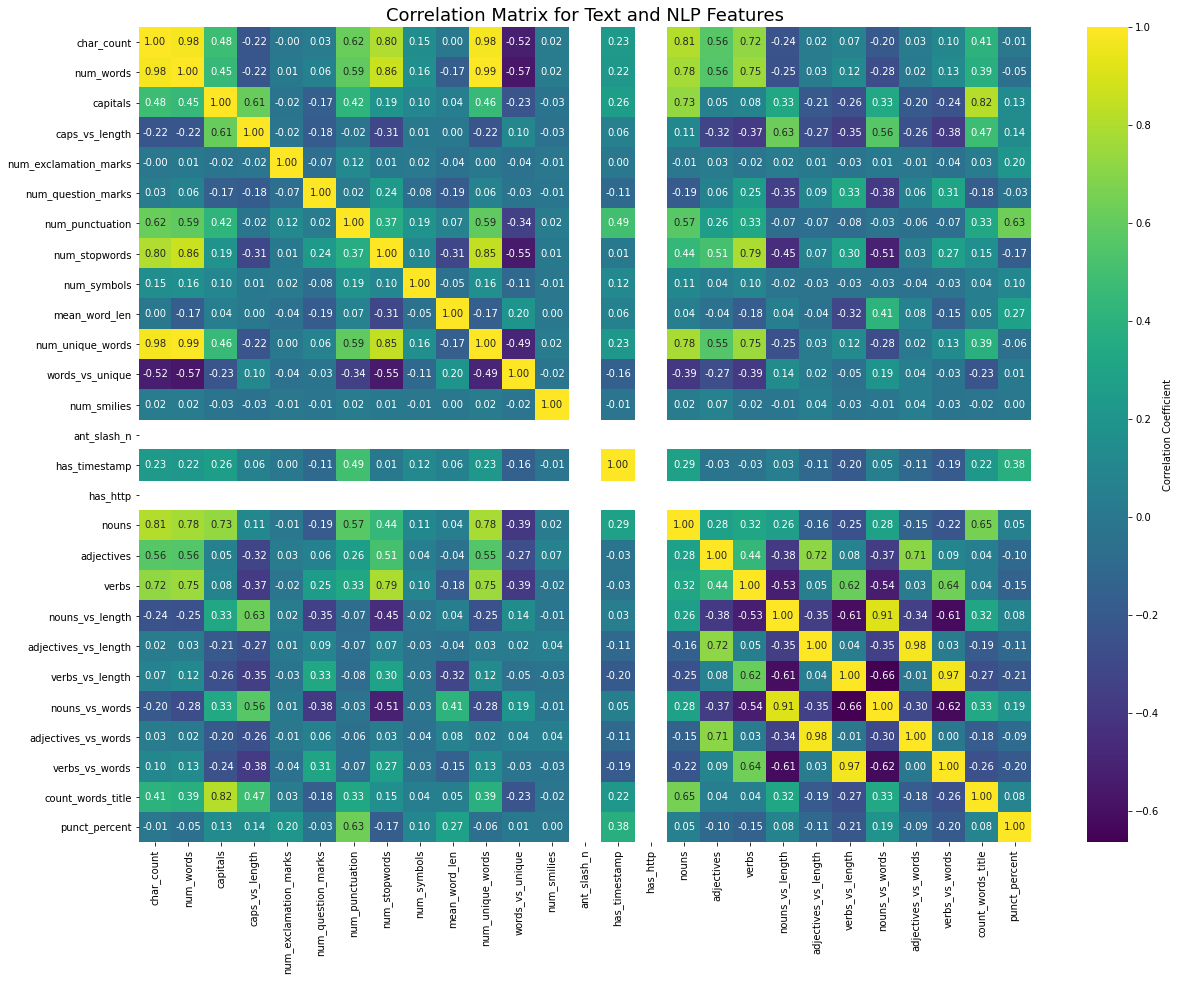

In [17]:
%matplotlib inline
f, ax = plt.subplots(figsize= [20,15])

sns.heatmap(df.drop(['author', 'created_utc', 'link_flair_text', 'num_comments', 'score', 'over_18', 'selftext', 'title', 'url', 'comments', 'comments_author'], axis=1).corr(), annot=True, fmt=".2f", ax=ax, 
            cbar_kws={'label': 'Correlation Coefficient'}, cmap='viridis')


ax.set_title("Correlation Matrix for Text and NLP Features", fontsize=18)